# Árboles de Decisión y Random Forest

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def plot_decision_boundary(model, X, y, title="Frontera de decisión"):
    # Solo válido para 2D
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(title)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.tight_layout(); plt.show()


## 2) Dataset 2D (make_moons) para visualización

In [ ]:
X, y = make_moons(n_samples=600, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X.shape, np.bincount(y)

((600, 2), array([300, 300]))

## Decision Tree

Decision Tree - Accuracy train: 1.0
Decision Tree - Accuracy test : 0.8722222222222222

Reporte (test):
               precision    recall  f1-score   support

           0       0.89      0.86      0.87        90
           1       0.86      0.89      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180

Matriz de confusión (test):
 [[77 13]
 [10 80]]


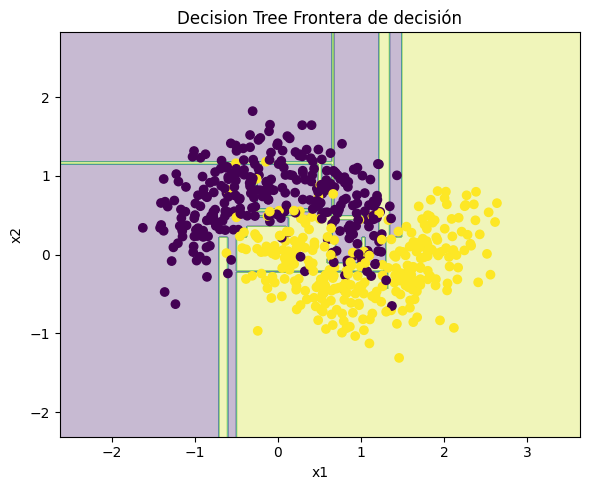

In [ ]:
dt = DecisionTreeClassifier(
    criterion='gini',   # 'gini' | 'entropy' | 'log_loss'
    max_depth=None,     # limitar ayuda a evitar overfitting
    min_samples_leaf=1,
    random_state=42
)
dt.fit(X_train, y_train)
yhat_train = dt.predict(X_train)
yhat_test = dt.predict(X_test)
print('Decision Tree - Accuracy train:', accuracy_score(y_train, yhat_train))
print('Decision Tree - Accuracy test :', accuracy_score(y_test, yhat_test))
print('\nReporte (test):\n', classification_report(y_test, yhat_test))
print('Matriz de confusión (test):\n', confusion_matrix(y_test, yhat_test))

plot_decision_boundary(dt, X, y, title='Decision Tree Frontera de decisión')


### 3.1) Visualización del árbol

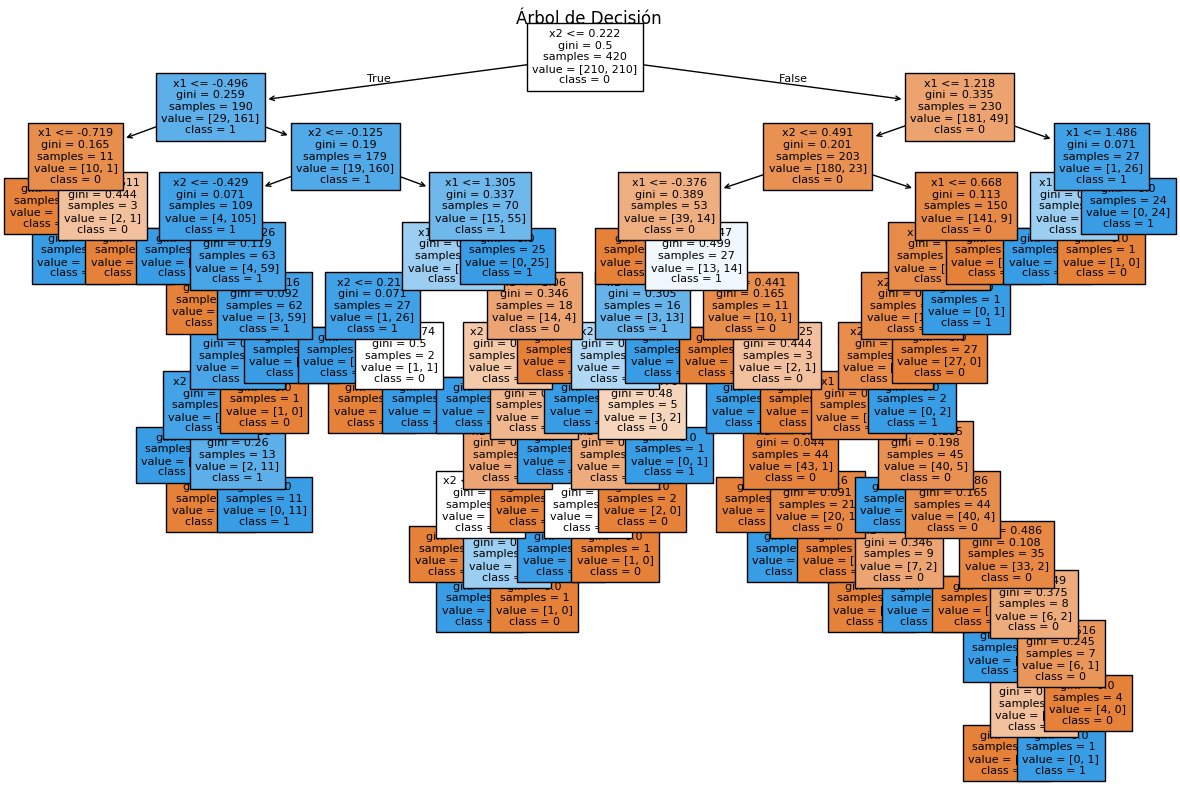

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=['x1','x2'], class_names=['0','1'], fontsize=8)
plt.title('Árbol de Decisión')
plt.tight_layout(); plt.show()

## 4) Random Forest (dataset 2D)

Random Forest - Accuracy train: 1.0
Random Forest - Accuracy test : 0.8777777777777778
OOB score: 0.9071428571428571

Reporte (test):
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        90
           1       0.89      0.87      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180

Matriz de confusión (test):
 [[80 10]
 [12 78]]


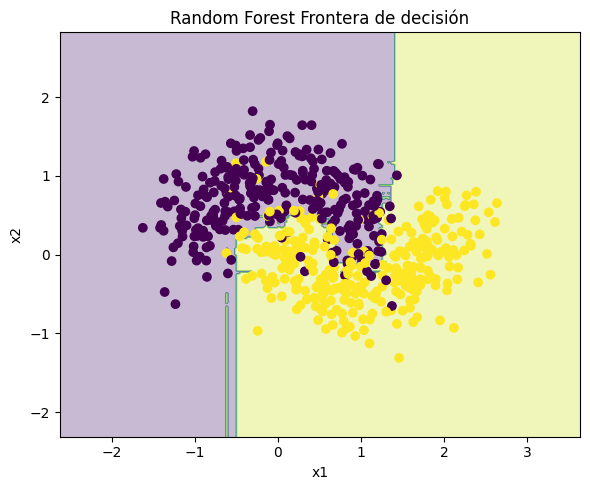

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    max_features='sqrt',
    oob_score=True,
    random_state=42
)
rf.fit(X_train, y_train)
yhat_rf_train = rf.predict(X_train)
yhat_rf_test = rf.predict(X_test)
print('Random Forest - Accuracy train:', accuracy_score(y_train, yhat_rf_train))
print('Random Forest - Accuracy test :', accuracy_score(y_test, yhat_rf_test))
print('OOB score:', rf.oob_score_)
print('\nReporte (test):\n', classification_report(y_test, yhat_rf_test))
print('Matriz de confusión (test):\n', confusion_matrix(y_test, yhat_rf_test))

plot_decision_boundary(rf, X, y, title='Random Forest Frontera de decisión')


### Importancia de variables en RF

In [ ]:
for name, imp in zip(['x1','x2'], rf.feature_importances_):
    print(f'{name}: {imp:.3f}')

x1: 0.458
x2: 0.542


# Actividad
Vamos a analizar como funcionan estos modelos en un dataset real y ajustar parámetros:

1. Aplique Decision Tree inicial con los parámetros que estime conveniente y muestre `classification_report`
2. Muestre cuales son las `features` más importantes para el modelo anterior
3. Repita los pasos 1 y 2 para Random Forest
4. Cree varios modelos Decision Tree cambiando el atributo `max_depth`. Genere un grafico de `accuracy` vs `max_depth`
4. Cuanto termine, me avisa para marcarlo como logrado.
5. Pueden trabajar de a dos o tres.

## Dataset real (Breast Cancer)

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target
feat_names = list(data.feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X.shape, np.bincount(y)

((569, 30), array([212, 357]))